#  Task1

### user story: “As a Procurement Manager of LightBox, I want to know any insights from the data about movies, so that I can apply the insight in my decisions.” 

#### Apply K-means or other unsupervised learning model using Python to perform analysis on the same movie dataset.  Interpret on what you found.

Theory: Partitional clustering divides data objects into nonoverlapping groups. These techniques require the user to specify the number of clusters, indicated by the variable k. Many partitional clustering algorithms work through an iterative process to assign subsets of data points into k clusters. Two examples of partitional clustering algorithms are k-means and k-medoids.

k-means => The k-means clustering algorithm represents each cluster by its corresponding cluster centroid. The algorithm would partition the input data into k disjoint clusters by iteratively applying the following two steps:

Form k clusters by assigning each instance to its nearest centroid.
Recompute the centroid of each cluster.

# TECHNICAL WARNING

1) K-means is sensible to the outliar

2) Normalization(sklearn.preprocessing)

K-means clustering is "isotropic" in all directions of space and therefore tends to produce more or less round (rather than elongated) clusters. In this situation leaving variances unequal is equivalent to putting more weight on variables with smaller variance.

notes in this database:

k-means clustering is very sensitive to scale due to its reliance on Euclidean distance so be sure to normalize data if there are likely to be scaling problems.

If there are some symmetries in your data, some of the labels may be mis-labelled

It is recommended to do the same k-means with different initial centroids and take the most common label.

In [1]:
#understand data and clean 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.cluster import KMeans

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
df=pd.read_csv('./data/movies_metadata.csv')
dfOrig=df.copy()

C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
dfOrig.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [6]:
dfOrig.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [7]:
dfOrig.shape

(45466, 24)

In [8]:
#number of NaN value each column
count_nan = len(dfOrig) - dfOrig.count() #number of empty cells, another way to count
print(count_nan)

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64


In [9]:
#delete duplicate
dfOrig.drop_duplicates(keep = 'first', inplace = True) 
dfOrig.drop_duplicates(subset ='id', keep = 'first', inplace = True) 

In [10]:
#delete the row with wrong id (can be a mistake)
dfOrig.drop(dfOrig.loc[dfOrig['id'].isnull()].index, inplace = True)
dfOrig['id']=pd.to_numeric(dfOrig['id'],errors='coerce')
dfOrig.drop(dfOrig.loc[dfOrig['id'].isnull()].index, inplace = True)
dfOrig['id'] = dfOrig['id'].astype(int)

In [11]:
dfOrig.shape

(45433, 24)

In [12]:
listDel=['adult','belongs_to_collection','homepage', 'imdb_id', 'original_title', 'poster_path', 'tagline','video']
dfOrig.drop(columns=listDel, inplace=True, errors='raise')

In [13]:
dfOrig.columns

Index(['budget', 'genres', 'id', 'original_language', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'title',
       'vote_average', 'vote_count'],
      dtype='object')

In [14]:
revenueThreshold={'no':0, 'low':1000, 'medium':100000, 'high':1000000, 'toomuch':100000000}
budgetThreshold= {'no':0, 'low':1000, 'medium':100000, 'high':1000000, 'toomuch':100000000}
popularityThreshold={'no':0, 'low':0.38, 'medium':1.1, 'high':3.6, 'toomuch':20}
vote_averageThreshold= {'no':0, 'low':5, 'medium':6, 'high':6.8, 'toomuch':8}
vote_countThreshold= {'no':0, 'low':3, 'medium':10, 'high':34, 'toomuch':100}
vote_countThreshold= {'no':0, 'low':3, 'medium':10, 'high':34, 'toomuch':100}
yearThreshold={'no':0, 'low':1992, 'medium':2004, 'high':2011}
# 25% 50% 75%
#pop 0.4 1.1 3.6
#va 5 6 6.8
#vc 3 10 34 
#year 92 04 11

In [15]:
revenueMin=revenueThreshold['low']
budgetMin=budgetThreshold['low']
popularityMin=popularityThreshold['low']
vote_averageMin=vote_averageThreshold['low']
vote_countMin=vote_countThreshold['low']
yearMin=yearThreshold['low']

In [16]:
# add others columns

In [17]:
df2=dfOrig[['budget','revenue','popularity','vote_average','vote_count','release_date']]

In [18]:
dictBDPVVR={'budget':0,'revenue':1,'popularity':2,'vote_average':3,'vote_count':4,'newYear':5}

In [19]:
df2.columns


Index(['budget', 'revenue', 'popularity', 'vote_average', 'vote_count',
       'release_date'],
      dtype='object')

In [20]:
df2.dtypes

budget           object
revenue         float64
popularity       object
vote_average    float64
vote_count      float64
release_date     object
dtype: object

In [21]:
df2 = df2.drop(df2.loc[df2['budget'].isnull()].index) #delete the rows with NULLS values in 'budget'
df2["budget"] = pd.to_numeric(df2["budget"], downcast='integer',errors='coerce')#force all the budget values to be numeric
df2.shape

(45433, 6)

In [22]:
df2=df2.drop(df2.loc[df2['revenue'].isnull()].index) #delete the rows with NULLS values in 'revenue'
df2["revenue"] = pd.to_numeric(df2["revenue"], downcast='integer',errors='coerce')#force all the values to be numeric
df2.shape

(45430, 6)

In [23]:
df2=df2.drop(df2.loc[df2['popularity'].isnull()].index) #delete the rows with NULLS values in 'popularity'
df2["popularity"] = pd.to_numeric(df2["popularity"], downcast='integer',errors='coerce')#force all the values to be numeric
df2.shape

(45430, 6)

In [24]:
df2=df2.drop(df2.loc[df2['vote_average'].isnull()].index) #delete the rows with NULLS values in 'vote_average'
df2["vote_average"] = pd.to_numeric(df2["vote_average"], downcast='integer',errors='coerce')#force all the values to be numeric

df2.shape

(45430, 6)

In [25]:
df2=df2.drop(df2.loc[df2['vote_count'].isnull()].index) #delete the rows with NULLS values in 'vote_count'
df2["vote_count"] = pd.to_numeric(df2["vote_count"], downcast='integer',errors='coerce')#force all the values to be numeric
df2.shape

(45430, 6)

In [26]:
df2.dtypes

budget            int32
revenue           int64
popularity      float64
vote_average    float64
vote_count        int16
release_date     object
dtype: object

In [27]:
df2.dtypes

budget            int32
revenue           int64
popularity      float64
vote_average    float64
vote_count        int16
release_date     object
dtype: object

In [28]:
df2

,budget,revenue,popularity,vote_average,vote_count,release_date
0,30000000,373554033,21.946943,7.7,5415,1995-10-30
1,65000000,262797249,17.015539,6.9,2413,1995-12-15
2,0,0,11.712900,6.5,92,1995-12-22
3,16000000,81452156,3.859495,6.1,34,1995-12-22
4,0,76578911,8.387519,5.7,173,1995-02-10
...,...,...,...,...,...,...
45461,0,0,0.072051,4.0,1,NaN
45462,0,0,0.178241,9.0,3,2011-11-17
45463,0,0,0.903007,3.8,6,2003-08-01
45464,0,0,0.003503,0.0,0,1917-10-21


In [29]:
df2.describe()

,budget,revenue,popularity,vote_average,vote_count
count,4.543000e+04,4.543000e+04,45430.000000,45430.000000,45430.000000
mean,4.224828e+06,1.121288e+07,2.921206,5.618329,109.935989
std,1.742853e+07,6.435213e+07,6.006708,1.924139,491.466335
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,0.000000e+00,0.385872,5.000000,3.000000
50%,0.000000e+00,0.000000e+00,1.127238,6.000000,10.000000
75%,0.000000e+00,0.000000e+00,3.678128,6.800000,34.000000
max,3.800000e+08,2.787965e+09,547.488298,10.000000,14075.000000


In [30]:
print('budgetMin=',budgetMin)
print('revenueMin=',revenueMin)
print('popularityMin=',popularityMin)
print('vote_averageMin=',vote_averageMin)
print('vote_countMin=',vote_countMin)
print('yearMin=',yearMin)

budgetMin= 1000
revenueMin= 1000
popularityMin= 0.38
vote_averageMin= 5
vote_countMin= 3
yearMin= 1992


In [31]:
df2 = df2.drop(df2.loc[df2['budget']<budgetMin].index) #delete the rows with values<budgetMin in 'budget'
df2= df2.drop(df2.loc[df2['revenue']<revenueMin].index) #delete the rows with values<revenueMin in 'revenue'
df2= df2.drop(df2.loc[df2['popularity']<popularityMin].index) #delete the rows with values<popularityMin in 'popularity'
df2= df2.drop(df2.loc[df2['vote_average']<vote_averageMin].index) #delete the rows with values<vote_averageMin in 'vote_average'
df2= df2.drop(df2.loc[df2['vote_count']<vote_countMin].index) #delete the rows with values<vote_countMin in 'vote_count'

In [32]:
df2["budget"] = pd.to_numeric(df2["budget"], downcast='integer',errors='coerce')#force all the budget values to be numeric
df2["revenue"] = pd.to_numeric(df2["revenue"], downcast='integer',errors='coerce')#force all the values to be numeric
df2["popularity"] = pd.to_numeric(df2["popularity"], downcast='integer',errors='coerce')#force all the budget values to be numeric
df2["vote_average"] = pd.to_numeric(df2["vote_average"], downcast='integer',errors='coerce')#force all the values to be numeric
df2["vote_count"] = pd.to_numeric(df2["vote_count"], downcast='integer',errors='coerce')#force all the values to be numeric

df2 = df2.drop(df2.loc[df2['budget'].isnull()].index) #delete the rows with NULLS values in 'budget'
df2 = df2.drop(df2.loc[df2['revenue'].isnull()].index) #delete the rows with NULLS values in 'budget'
df2 = df2.drop(df2.loc[df2['popularity'].isnull()].index) #delete the rows with NULLS values in 'budget'
df2 = df2.drop(df2.loc[df2['vote_average'].isnull()].index) #delete the rows with NULLS values in 'budget'
df2 = df2.drop(df2.loc[df2['vote_count'].isnull()].index) #delete the rows with NULLS values in 'budget'

In [33]:
df2['newYear']=df2['release_date'].str.split('-|/', expand=True)[0]
df2["newYear"] = pd.to_numeric(df2["newYear"],errors='coerce')
if yearMin!=0:
    df2 = df2.drop(df2.loc[df2['newYear']<yearMin].index) #delete the rows with 'newYear'<yearMin 
df2.drop(['release_date'], axis='columns', inplace=True)

In [34]:
df2['newYear'].describe()

count    3824.000000
mean     2006.584728
std         6.731084
min      1992.000000
25%      2002.000000
50%      2007.000000
75%      2012.000000
max      2017.000000
Name: newYear, dtype: float64

In [35]:
df2.dtypes

budget            int32
revenue           int64
popularity      float64
vote_average    float64
vote_count        int16
newYear           int64
dtype: object

# delete outliar -> IMPORTANT STEP!

In [36]:
df2.describe()

,budget,revenue,popularity,vote_average,vote_count,newYear
count,3.824000e+03,3.824000e+03,3824.000000,3824.000000,3824.000000,3824.000000
mean,3.842863e+07,1.103501e+08,10.801485,6.352720,896.444561,2006.584728
std,4.417643e+07,1.872745e+08,15.884951,0.711828,1393.015622,6.731084
min,2.500000e+03,1.596000e+03,0.386717,5.000000,3.000000,1992.000000
25%,9.000000e+06,1.002351e+07,6.257846,5.800000,117.000000,2002.000000
50%,2.400000e+07,4.160768e+07,8.969048,6.300000,381.000000,2007.000000
75%,5.000000e+07,1.263232e+08,12.320154,6.800000,1026.500000,2012.000000
max,3.800000e+08,2.787965e+09,547.488298,9.100000,14075.000000,2017.000000


In [37]:
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3 - Q1
df2 = df2[~((df2 < (Q1 - 1.5 * IQR)) |(df2 > (Q3 + 1.5 * IQR))).any(axis=1)] # I trust on you!
print('Q1=',Q1)
print('Q3=',Q3)
print('IQR=',IQR)


Q1= budget          9.000000e+06
revenue         1.002351e+07
popularity      6.257846e+00
vote_average    5.800000e+00
vote_count      1.170000e+02
newYear         2.002000e+03
Name: 0.25, dtype: float64
Q3= budget          5.000000e+07
revenue         1.263232e+08
popularity      1.232015e+01
vote_average    6.800000e+00
vote_count      1.026500e+03
newYear         2.012000e+03
Name: 0.75, dtype: float64
IQR= budget          4.100000e+07
revenue         1.162997e+08
popularity      6.062309e+00
vote_average    1.000000e+00
vote_count      9.095000e+02
newYear         1.000000e+01
dtype: float64


In [38]:
df2.describe()

,budget,revenue,popularity,vote_average,vote_count,newYear
count,3.221000e+03,3.221000e+03,3221.000000,3221.000000,3221.000000,3221.000000
mean,2.625167e+07,5.450347e+07,8.340052,6.288420,466.564731,2006.202422
std,2.413087e+07,6.315090e+07,3.949126,0.678008,501.895417,6.677580
min,2.500000e+03,1.596000e+03,0.386717,5.000000,3.000000,1992.000000
25%,7.400000e+06,7.087452e+06,5.794821,5.800000,93.000000,2001.000000
50%,1.925000e+07,2.857508e+07,8.176147,6.300000,288.000000,2007.000000
75%,3.800000e+07,8.246667e+07,10.956665,6.800000,660.000000,2012.000000
max,1.100000e+08,3.002281e+08,21.183077,8.200000,2382.000000,2017.000000


# Normalizing

In [39]:
df2.dtypes

budget            int32
revenue           int64
popularity      float64
vote_average    float64
vote_count        int16
newYear           int64
dtype: object

In [40]:
df2['vote_average'] = df2['vote_average'].apply(lambda x: x*10)
df2['vote_average'] = df2['vote_average'].apply(np.int64)

In [41]:
df2['popularity'] = df2['popularity'].apply(lambda x: x*100)
df2['popularity'] = df2['popularity'].apply(np.int64)

In [42]:
df2.dtypes

budget          int32
revenue         int64
popularity      int64
vote_average    int64
vote_count      int16
newYear         int64
dtype: object

In [43]:
df2Int=df2.copy()
df2Int.dtypes

budget          int32
revenue         int64
popularity      int64
vote_average    int64
vote_count      int16
newYear         int64
dtype: object

In [44]:
df2.describe()

,budget,revenue,popularity,vote_average,vote_count,newYear
count,3.221000e+03,3.221000e+03,3221.000000,3221.000000,3221.000000,3221.000000
mean,2.625167e+07,5.450347e+07,833.503260,62.884197,466.564731,2006.202422
std,2.413087e+07,6.315090e+07,394.909779,6.780081,501.895417,6.677580
min,2.500000e+03,1.596000e+03,38.000000,50.000000,3.000000,1992.000000
25%,7.400000e+06,7.087452e+06,579.000000,58.000000,93.000000,2001.000000
50%,1.925000e+07,2.857508e+07,817.000000,63.000000,288.000000,2007.000000
75%,3.800000e+07,8.246667e+07,1095.000000,68.000000,660.000000,2012.000000
max,1.100000e+08,3.002281e+08,2118.000000,82.000000,2382.000000,2017.000000


In [45]:
df2.shape

(3221, 6)

In [46]:
arrNormdf2=StandardScaler().fit_transform(df2)

In [47]:
arrNormdf2.shape

(3221, 6)

In [48]:
type(arrNormdf2)

numpy.ndarray

In [49]:
df2=pd.DataFrame(data=arrNormdf2, columns=["budget", "revenue", "popularity", "vote_average", "vote_count","newYear"])

In [50]:
df2

,budget,revenue,popularity,vote_average,vote_count,newYear
0,-0.424902,0.426801,-1.135887,-0.277945,-0.861996,-1.677878
1,1.398771,2.105338,2.427505,2.082275,2.828589,-1.677878
2,0.362593,0.155948,-0.786386,-1.163028,-0.583010,-1.677878
3,1.481666,0.845345,-0.512863,0.312110,-0.533191,-1.677878
4,0.735617,-0.646516,-0.821843,1.197192,-0.786271,-1.677878
...,...,...,...,...,...,...
3216,-0.734927,0.025285,-1.667737,-0.130431,-0.919786,1.617241
3217,-1.005162,-0.678439,-1.743715,-1.458055,-0.911815,0.868350
3218,-0.997017,-0.825008,-1.872879,-1.015514,-0.909822,-0.180096
3219,-0.590691,-0.562288,-1.776639,0.902165,-0.879931,0.119460


In [51]:
def assignment5(df, centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 + (y1 - y2)^2) was sqrt((x1 - x2)^2 - (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['budget'] - centroids[i][0]) ** 2
                + (df['revenue'] - centroids[i][1]) ** 2
                + (df['popularity'] - centroids[i][2]) ** 2
                + (df['vote_average'] - centroids[i][3]) ** 2
                + (df['vote_count'] - centroids[i][4]) ** 2
                + (df['newYear'] - centroids[i][5]) ** 2
            )
        )

    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    #df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=0)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df


In [52]:
def buildCentroides5(k, df1b):

    if k == 5:
        bud1, bud2, bud3, bud4, bud5 = ((2*df1b['budget'].min()+2*df1b['budget'].mean())/4,
                                        (df1b['budget'].min()+4*df1b['budget'].mean())/5, 
                                        df1b['budget'].mean(),
                                        (df1b['budget'].max()+4*df1b['budget'].mean())/5, 
                                        (df1b['budget'].max()+2*df1b['budget'].mean())/3)
        rev1, rev2, rev3, rev4, rev5 = ((2*df1b['revenue'].min()+2*df1b['revenue'].mean())/4,
                                        (df1b['revenue'].min()+4*df1b['revenue'].mean())/5, 
                                        df1b['revenue'].mean(),
                                        (df1b['revenue'].max()+4*df1b['revenue'].mean())/5, 
                                        (df1b['revenue'].max()+2*df1b['revenue'].mean())/3)
        pop1, pop2, pop3, pop4, pop5 = ((2*df1b['popularity'].min()+2*df1b['popularity'].mean())/4,
                                        (df1b['popularity'].min()+4*df1b['popularity'].mean())/5, 
                                        df1b['popularity'].mean(),
                                        (df1b['popularity'].max()+4*df1b['popularity'].mean())/5, 
                                        (df1b['popularity'].max()+2*df1b['popularity'].mean())/3)
        vav1, vav2, vav3, vav4, vav5 = ((2*df1b['vote_average'].min()+2*df1b['vote_average'].mean())/4,
                                        (df1b['vote_average'].min()+4*df1b['vote_average'].mean())/5, 
                                        df1b['vote_average'].mean(),
                                        (df1b['vote_average'].max()+4*df1b['vote_average'].mean())/5, 
                                        (df1b['vote_average'].max()+2*df1b['vote_average'].mean())/3)
        vco1, vco2, vco3, vco4, vco5 = ((2*df1b['vote_count'].min()+2*df1b['vote_count'].mean())/4,
                                        (df1b['vote_count'].min()+4*df1b['vote_count'].mean())/5, 
                                        df1b['vote_count'].mean(),
                                        (df1b['vote_count'].max()+4*df1b['vote_count'].mean())/5, 
                                        (df1b['vote_count'].max()+2*df1b['vote_count'].mean())/3)
        yea1, yea2, yea3, yea4, yea5 = ((2*df1b['newYear'].min()+2*df1b['newYear'].mean())/4,
                                        (df1b['newYear'].min()+4*df1b['newYear'].mean())/5, 
                                        df1b['newYear'].mean(),
                                        (df1b['newYear'].max()+4*df1b['newYear'].mean())/5, 
                                        (df1b['newYear'].max()+2*df1b['newYear'].mean())/3)
        
        bud=[bud1, bud2, bud3, bud4, bud5]
        rev=[rev1, rev2, rev3, rev4, rev5]
        pop=[pop1, pop2, pop3, pop4, pop5]
        vav=[vav1, vav2, vav3, vav4, vav5]
        vco=[vco1, vco2, vco3, vco4, vco5]
        yea=[yea1, yea2, yea3, yea4, yea5]
        centroids = {
            i+1: [bud[i], rev[i],pop[i], vco[1], vav[i], yea[i]] 
            for i in range(k)}
        colmap = {1: 'y', 2: 'g', 3: 'b', 4:'r', 5: 'm'}
    print('k: ',k)
    for i in centroids.keys():
        print('centroid: ',centroids[i])
    
    return centroids, colmap

In [53]:
## Assignment Stage
centroids, colmap=buildCentroides5(k=5, df1b=df2)
df2 = assignment5(df2, centroids)



k:  5
centroid:  [-0.5439764069362848, -0.4315880145991465, -1.0073525885826253, -0.18475431039828494, -0.9502981631417098, -1.0636059572314573]
centroid:  [-0.21759056277451388, -0.17263520583965872, -0.4029410354330502, -0.18475431039828494, -0.3801192652566841, -0.4254423828925857]
centroid:  [7.865659553538055e-17, -2.219756683820555e-16, -8.789409229413689e-17, -0.18475431039828494, -2.8098534916933485e-16, -4.666184260879908e-15]
centroid:  [0.6942255584242862, 0.7783349783884927, 0.650627687655787, -0.18475431039828494, 0.5639687566357716, 0.3234481842045461]
centroid:  [1.1570425973738103, 1.2972249639808215, 1.084379479426312, -0.18475431039828494, 0.9399479277262862, 0.5390803070075799]


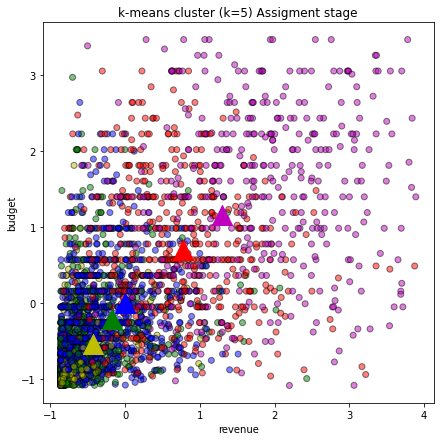

In [54]:
#plot 
fig = plt.figure(figsize=(7, 7))
plt.scatter(df2['revenue'], df2['budget'], color=df2['color'], alpha=0.5, edgecolor='k')
centroidsBR_Try = {
    i+1: [centroids[i+1][dictBDPVVR['revenue']],centroids[i+1][dictBDPVVR['budget']]] 
    for i in range(5)}
for i in centroidsBR_Try.keys():
    plt.scatter(*centroidsBR_Try[i], color=colmap[i],marker='^',s=400)
plt.title("k-means cluster (k=5) Assigment stage")
plt.xlabel('revenue')
plt.ylabel('budget')
plt.show()

In [55]:
df2['closest'].value_counts()

3    947
2    771
1    573
4    506
5    424
Name: closest, dtype: int64

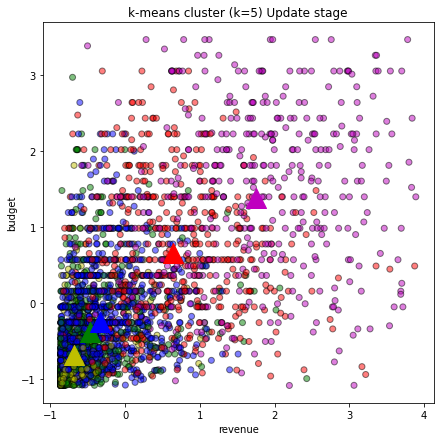

In [56]:
## Update Stage

import copy

old_centroids = copy.deepcopy(centroids)

def update5(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df2[df2['closest'] == i]['budget'])
        centroids[i][1] = np.mean(df2[df2['closest'] == i]['revenue'])
        centroids[i][2] = np.mean(df2[df2['closest'] == i]['popularity'])
        centroids[i][3] = np.mean(df2[df2['closest'] == i]['vote_average'])
        centroids[i][4] = np.mean(df2[df2['closest'] == i]['vote_count'])
        centroids[i][5] = np.mean(df2[df2['closest'] == i]['newYear'])
    return k

centroids = update5(centroids)
    

#plot 
fig = plt.figure(figsize=(7, 7))
plt.scatter(df2['revenue'], df2['budget'], color=df2['color'], alpha=0.5, edgecolor='k')
centroidsBR_Try = {
    i+1: [centroids[i+1][dictBDPVVR['revenue']],centroids[i+1][dictBDPVVR['budget']]] 
    for i in range(5)}
for i in centroidsBR_Try.keys():
    plt.scatter(*centroidsBR_Try[i], color=colmap[i],marker='^',s=400)
plt.title("k-means cluster (k=5) Update stage")
plt.xlabel('revenue')
plt.ylabel('budget')
plt.show()

In [57]:
df2['closest'].value_counts()

3    947
2    771
1    573
4    506
5    424
Name: closest, dtype: int64

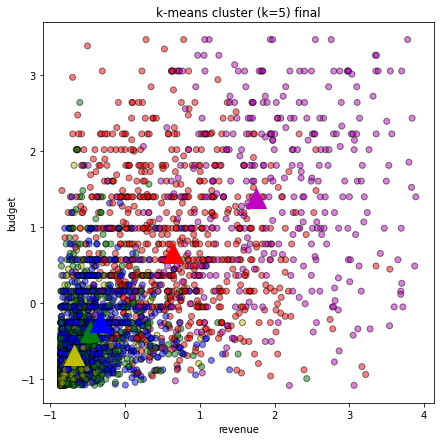

In [58]:
## Repeat Assigment Stage

df2 = assignment5(df2, centroids)


#plot 
fig = plt.figure(figsize=(7, 7))
plt.scatter(df2['revenue'], df2['budget'], color=df2['color'], alpha=0.5, edgecolor='k')
centroidsBR_Try = {
    i+1: [centroids[i+1][dictBDPVVR['revenue']],centroids[i+1][dictBDPVVR['budget']]] 
    for i in range(5)}
for i in centroidsBR_Try.keys():
    plt.scatter(*centroidsBR_Try[i], color=colmap[i],marker='^',s=400)
plt.title("k-means cluster (k=5) final")
plt.xlabel('revenue')
plt.ylabel('budget')
plt.show()

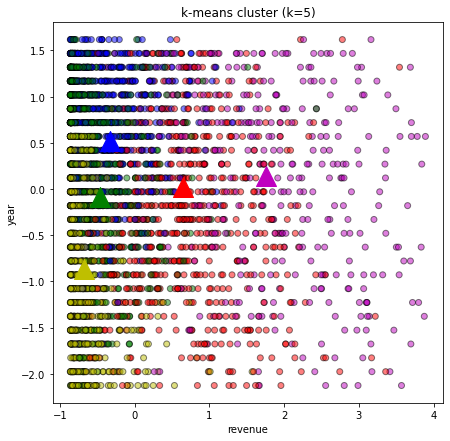

In [59]:
fig = plt.figure(figsize=(7, 7))
plt.scatter(df2['revenue'], df2['newYear'], color=df2['color'], alpha=0.5, edgecolor='k')
centroidsBR_Try = {
    i+1: [centroids[i+1][dictBDPVVR['revenue']],centroids[i+1][dictBDPVVR['newYear']]] 
    for i in range(5)}
for i in centroidsBR_Try.keys():
    plt.scatter(*centroidsBR_Try[i], color=colmap[i],marker='^',s=400)
plt.title("k-means cluster (k=5)")
plt.xlabel('revenue')
plt.ylabel('year')
plt.show()
plt.show()

In [60]:
df2['closest'].value_counts()

3    826
2    788
4    693
1    544
5    370
Name: closest, dtype: int64

In [61]:
centroids = update5(centroids)
df2 = assignment5(df2, centroids)
df2['closest'].value_counts()

2    840
3    762
4    720
1    528
5    371
Name: closest, dtype: int64

In [62]:
centroids = update5(centroids)
df2 = assignment5(df2, centroids)
df2['closest'].value_counts()

2    839
3    755
4    671
1    557
5    399
Name: closest, dtype: int64

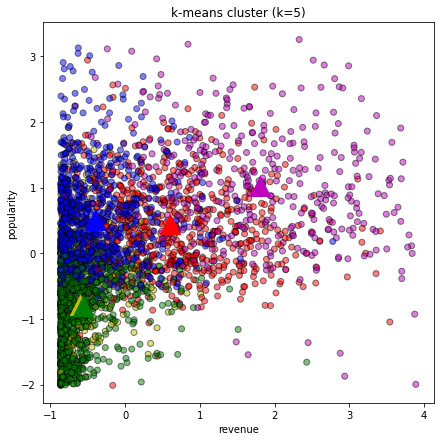

In [63]:
fig = plt.figure(figsize=(7, 7))
plt.scatter(df2['revenue'], df2['popularity'], color=df2['color'], alpha=0.5, edgecolor='k')
centroidsBR_Try = {
    i+1: [centroids[i+1][dictBDPVVR['revenue']],centroids[i+1][dictBDPVVR['popularity']]] 
    for i in range(5)}
for i in centroidsBR_Try.keys():
    plt.scatter(*centroidsBR_Try[i], color=colmap[i],marker='^',s=400)
plt.title("k-means cluster (k=5)")
plt.xlabel('revenue')
plt.ylabel('popularity')
plt.show()
plt.show()

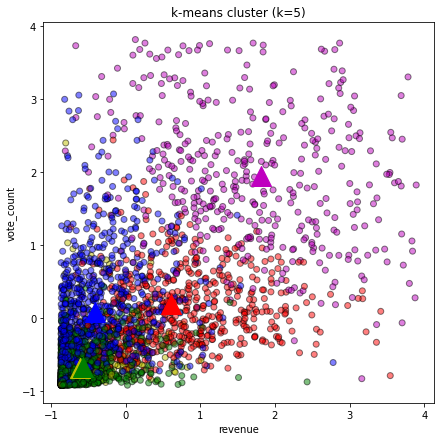

In [64]:
fig = plt.figure(figsize=(7, 7))
plt.scatter(df2['revenue'], df2['vote_count'], color=df2['color'], alpha=0.5, edgecolor='k')
centroidsBR_Try = {
    i+1: [centroids[i+1][dictBDPVVR['revenue']],centroids[i+1][dictBDPVVR['vote_count']]] 
    for i in range(5)}
for i in centroidsBR_Try.keys():
    plt.scatter(*centroidsBR_Try[i], color=colmap[i],marker='^',s=400)
plt.title("k-means cluster (k=5)")
plt.xlabel('revenue')
plt.ylabel('vote_count')
plt.show()
plt.show()

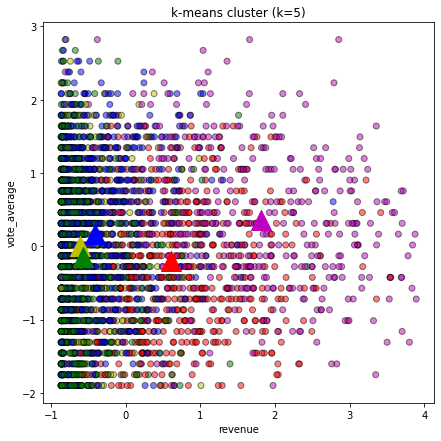

In [65]:
fig = plt.figure(figsize=(7, 7))
plt.scatter(df2['revenue'], df2['vote_average'], color=df2['color'], alpha=0.5, edgecolor='k')
centroidsBR_Try = {
    i+1: [centroids[i+1][dictBDPVVR['revenue']],centroids[i+1][dictBDPVVR['vote_average']]] 
    for i in range(5)}
for i in centroidsBR_Try.keys():
    plt.scatter(*centroidsBR_Try[i], color=colmap[i],marker='^',s=400)
plt.title("k-means cluster (k=5)")
plt.xlabel('revenue')
plt.ylabel('vote_average')
plt.show()
plt.show()

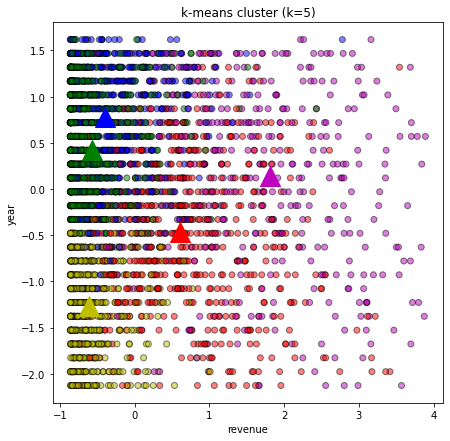

In [66]:
fig = plt.figure(figsize=(7, 7))
plt.scatter(df2['revenue'], df2['newYear'], color=df2['color'], alpha=0.5, edgecolor='k')
centroidsBR_Try = {
    i+1: [centroids[i+1][dictBDPVVR['revenue']],centroids[i+1][dictBDPVVR['newYear']]] 
    for i in range(5)}
for i in centroidsBR_Try.keys():
    plt.scatter(*centroidsBR_Try[i], color=colmap[i],marker='^',s=400)
plt.title("k-means cluster (k=5)")
plt.xlabel('revenue')
plt.ylabel('year')
plt.show()
plt.show()

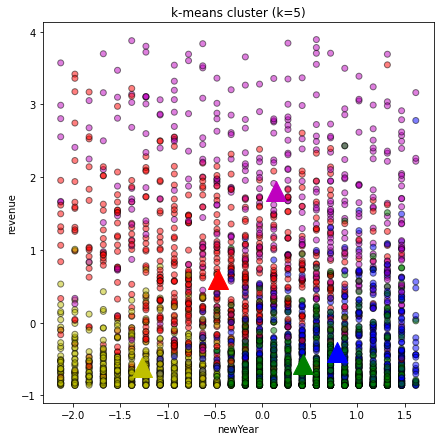

In [67]:
fig = plt.figure(figsize=(7, 7))
plt.scatter(df2['newYear'], df2['revenue'], color=df2['color'], alpha=0.5, edgecolor='k')
centroidsBR_Try = {
    i+1: [centroids[i+1][dictBDPVVR['newYear']],centroids[i+1][dictBDPVVR['revenue']]] 
    for i in range(5)}
for i in centroidsBR_Try.keys():
    plt.scatter(*centroidsBR_Try[i], color=colmap[i],marker='^',s=400)
plt.title("k-means cluster (k=5)")
plt.xlabel('newYear')
plt.ylabel('revenue')
plt.show()
plt.show()

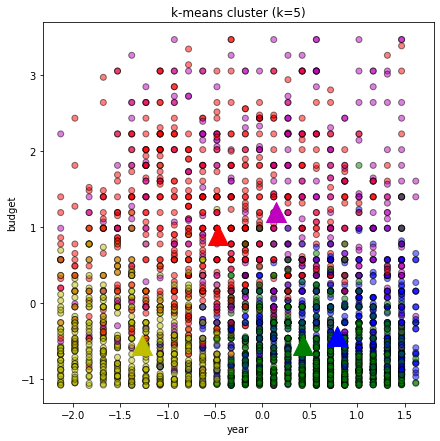

In [68]:
fig = plt.figure(figsize=(7, 7))
plt.scatter(df2['newYear'], df2['budget'], color=df2['color'], alpha=0.5, edgecolor='k')
centroidsBR_Try = {
    i+1: [centroids[i+1][dictBDPVVR['newYear']],centroids[i+1][dictBDPVVR['budget']]] 
    for i in range(5)}
for i in centroidsBR_Try.keys():
    plt.scatter(*centroidsBR_Try[i], color=colmap[i],marker='^',s=400)
plt.title("k-means cluster (k=5)")
plt.xlabel('year')
plt.ylabel('budget')
plt.show()

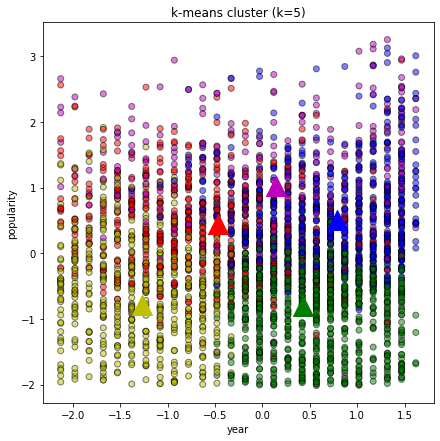

In [69]:
fig = plt.figure(figsize=(7, 7))
plt.scatter(df2['newYear'], df2['popularity'], color=df2['color'], alpha=0.5, edgecolor='k')
centroidsBR_Try = {
    i+1: [centroids[i+1][dictBDPVVR['newYear']],centroids[i+1][dictBDPVVR['popularity']]] 
    for i in range(5)}
for i in centroidsBR_Try.keys():
    plt.scatter(*centroidsBR_Try[i], color=colmap[i],marker='^',s=400)
plt.title("k-means cluster (k=5)")
plt.xlabel('year')
plt.ylabel('popularity')
plt.show()

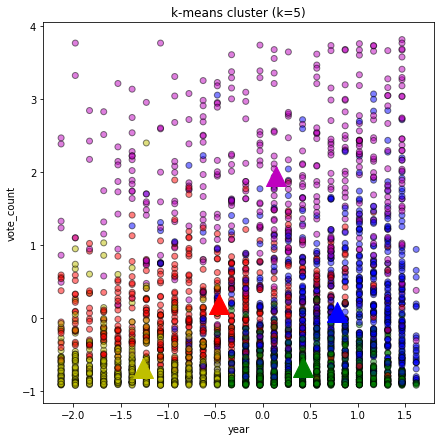

In [70]:
fig = plt.figure(figsize=(7, 7))
plt.scatter(df2['newYear'], df2['vote_count'], color=df2['color'], alpha=0.5, edgecolor='k')
centroidsBR_Try = {
    i+1: [centroids[i+1][dictBDPVVR['newYear']],centroids[i+1][dictBDPVVR['vote_count']]] 
    for i in range(5)}
for i in centroidsBR_Try.keys():
    plt.scatter(*centroidsBR_Try[i], color=colmap[i],marker='^',s=400)
plt.title("k-means cluster (k=5)")
plt.xlabel('year')
plt.ylabel('vote_count')
plt.show()

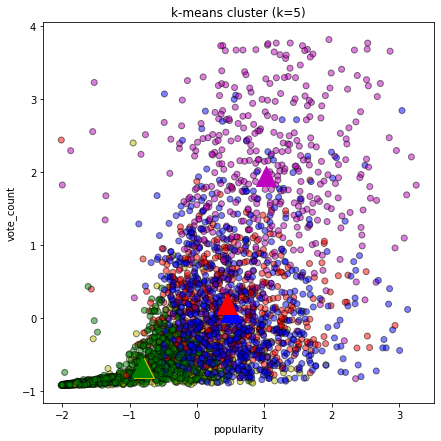

In [71]:
fig = plt.figure(figsize=(7, 7))
plt.scatter(df2['popularity'], df2['vote_count'], color=df2['color'], alpha=0.5, edgecolor='k')
centroidsBR_Try = {
    i+1: [centroids[i+1][dictBDPVVR['popularity']],centroids[i+1][dictBDPVVR['vote_count']]] 
    for i in range(5)}
for i in centroidsBR_Try.keys():
    plt.scatter(*centroidsBR_Try[i], color=colmap[i],marker='^',s=400)
plt.title("k-means cluster (k=5)")
plt.xlabel('popularity')
plt.ylabel('vote_count')
plt.show()

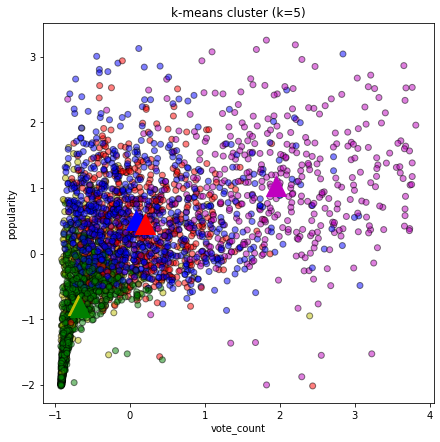

In [72]:
fig = plt.figure(figsize=(7, 7))
plt.scatter(df2['vote_count'], df2['popularity'], color=df2['color'], alpha=0.5, edgecolor='k')
centroidsBR_Try = {
    i+1: [centroids[i+1][dictBDPVVR['vote_count']],centroids[i+1][dictBDPVVR['popularity']]] 
    for i in range(5)}
for i in centroidsBR_Try.keys():
    plt.scatter(*centroidsBR_Try[i], color=colmap[i],marker='^',s=400)
plt.title("k-means cluster (k=5)")
plt.xlabel('vote_count')
plt.ylabel('popularity')
plt.show()

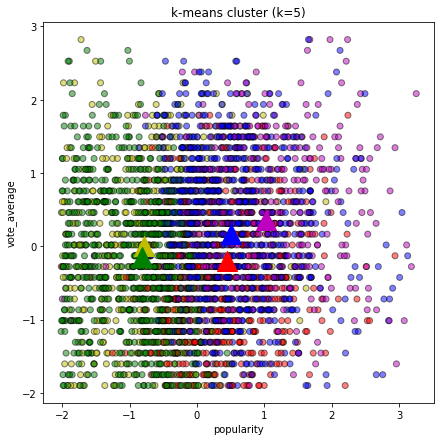

In [73]:
fig = plt.figure(figsize=(7, 7))
plt.scatter(df2['popularity'], df2['vote_average'], color=df2['color'], alpha=0.5, edgecolor='k')
centroidsBR_Try = {
    i+1: [centroids[i+1][dictBDPVVR['popularity']],centroids[i+1][dictBDPVVR['vote_average']]] 
    for i in range(5)}
for i in centroidsBR_Try.keys():
    plt.scatter(*centroidsBR_Try[i], color=colmap[i],marker='^',s=400)
plt.title("k-means cluster (k=5)")
plt.xlabel('popularity')
plt.ylabel('vote_average')
plt.show()

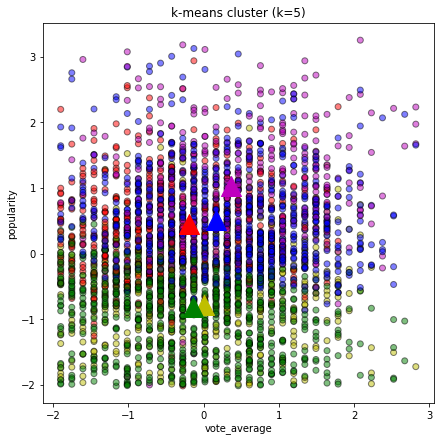

In [74]:
fig = plt.figure(figsize=(7, 7))
plt.scatter(df2['vote_average'], df2['popularity'], color=df2['color'], alpha=0.5, edgecolor='k')
centroidsBR_Try = {
    i+1: [centroids[i+1][dictBDPVVR['vote_average']],centroids[i+1][dictBDPVVR['popularity']]] 
    for i in range(5)}
for i in centroidsBR_Try.keys():
    plt.scatter(*centroidsBR_Try[i], color=colmap[i],marker='^',s=400)
plt.title("k-means cluster (k=5)")
plt.xlabel('vote_average')
plt.ylabel('popularity')
plt.show()

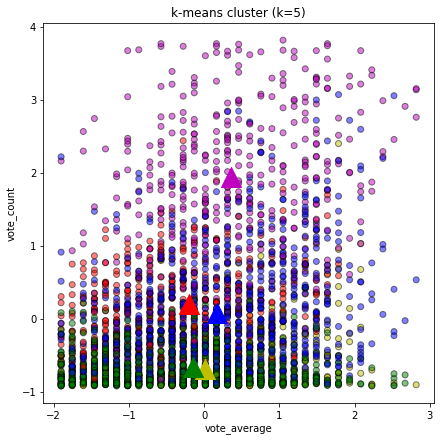

In [75]:
fig = plt.figure(figsize=(7, 7))
plt.scatter(df2['vote_average'], df2['vote_count'], color=df2['color'], alpha=0.5, edgecolor='k')
centroidsBR_Try = {
    i+1: [centroids[i+1][dictBDPVVR['vote_average']],centroids[i+1][dictBDPVVR['vote_count']]] 
    for i in range(5)}
for i in centroidsBR_Try.keys():
    plt.scatter(*centroidsBR_Try[i], color=colmap[i],marker='^',s=400)
plt.title("k-means cluster (k=5)")
plt.xlabel('vote_average')
plt.ylabel('vote_count')
plt.show()

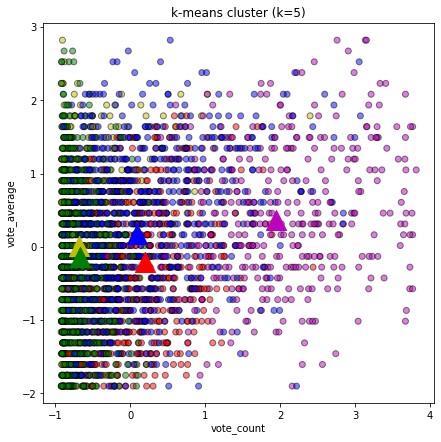

In [76]:
fig = plt.figure(figsize=(7, 7))
plt.scatter(df2['vote_count'], df2['vote_average'], color=df2['color'], alpha=0.5, edgecolor='k')
centroidsBR_Try = {
    i+1: [centroids[i+1][dictBDPVVR['vote_count']],centroids[i+1][dictBDPVVR['vote_average']]] 
    for i in range(5)}
for i in centroidsBR_Try.keys():
    plt.scatter(*centroidsBR_Try[i], color=colmap[i],marker='^',s=400)
plt.title("k-means cluster (k=5)")
plt.xlabel('vote_count')
plt.ylabel('vote_average')
plt.show()

In [77]:
#vote_average, not so correlate with revenue or popularity,
#next step remove the vote_average

# search for the best k value

In [78]:
from sklearn.preprocessing import MinMaxScaler
data=df2Int.copy()
mms = MinMaxScaler()
mms.fit(data)
data_transformed = mms.transform(data)
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

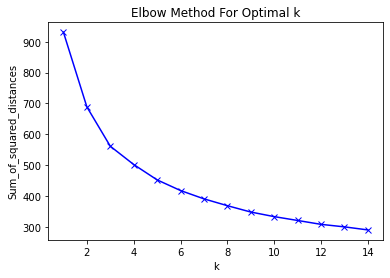

In [79]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

# others info

In [80]:
df2.describe()

,budget,revenue,popularity,vote_average,vote_count,newYear,distance_from_1,distance_from_2,distance_from_3,distance_from_4,distance_from_5,closest
count,3.221000e+03,3.221000e+03,3.221000e+03,3.221000e+03,3.221000e+03,3.221000e+03,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000
mean,7.865660e-17,-2.219757e-16,-8.789409e-17,-2.809853e-16,3.760488e-17,-4.666184e-15,2.810241,2.521544,2.507516,2.662918,3.826547,2.849736
std,1.000155e+00,1.000155e+00,1.000155e+00,1.000155e+00,1.000155e+00,1.000155e+00,1.213542,1.253007,0.985128,0.755800,1.023973,1.278255
min,-1.087953e+00,-8.631760e-01,-2.014705e+00,-1.900596e+00,-9.237716e-01,-2.127212e+00,0.301926,0.289310,0.369216,0.437338,0.878121,1.000000
25%,-7.813477e-01,-7.509535e-01,-6.445593e-01,-7.204863e-01,-7.444235e-01,-7.792089e-01,1.948399,1.589657,1.772946,2.118988,3.104084,2.000000
50%,-2.901992e-01,-4.106422e-01,-4.179644e-02,1.708247e-02,-3.558360e-01,1.194598e-01,2.658349,2.269268,2.405186,2.666977,3.937006,3.000000
75%,4.869345e-01,4.428684e-01,6.622711e-01,7.546512e-01,3.854694e-01,8.683504e-01,3.418076,3.195404,3.085583,3.177140,4.607602,4.000000
max,3.471128e+00,3.891675e+00,3.253138e+00,2.819844e+00,3.816996e+00,1.617241e+00,7.533530,7.192830,6.593587,5.340239,6.196192,5.000000


In [81]:
df2.head(10)

,budget,revenue,popularity,vote_average,vote_count,newYear,distance_from_1,distance_from_2,distance_from_3,distance_from_4,distance_from_5,closest,color
0,-0.424902,0.426801,-1.135887,-0.277945,-0.861996,-1.677878,1.221613,2.363324,3.245829,2.623887,4.561229,1,y
1,1.398771,2.105338,2.427505,2.082275,2.828589,-1.677878,6.191573,6.559847,5.531390,4.475995,3.021229,5,m
2,0.362593,0.155948,-0.786386,-1.163028,-0.583010,-1.677878,1.724563,2.610978,3.300910,2.240155,4.328043,1,y
3,1.481666,0.845345,-0.512863,0.312110,-0.533191,-1.677878,2.570632,3.295467,3.567821,1.897549,3.582941,4,r
4,0.735617,-0.646516,-0.821843,1.197192,-0.786271,-1.677878,1.803186,2.808760,3.325918,2.758145,4.596864,1,y
5,2.973762,-0.704552,-0.267199,-0.868000,-0.656742,-1.677878,3.693989,4.202956,4.471193,3.033983,4.770029,4,r
6,1.067194,0.975734,0.454597,2.229789,1.746522,-1.677878,4.207748,4.742126,4.150726,3.155554,2.806327,5,m
7,-0.404179,1.274867,0.591358,1.344706,-0.204387,-1.677878,2.766158,3.497497,3.215675,2.485276,3.452190,4,r
8,-0.922268,-0.795100,0.173476,0.312110,0.144346,-1.677878,1.430894,2.536945,2.564744,2.660159,4.305059,1,y
9,0.155357,2.500464,-0.034199,-0.277945,1.318079,-1.677878,3.874514,4.347760,4.105417,2.666027,2.604439,5,m


In [82]:
df2['closest'].value_counts()

2    839
3    755
4    671
1    557
5    399
Name: closest, dtype: int64